In [118]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = (r"C:\Users\khanh\Desktop\UCIRV201810DATA4\Homeworks\HW05-Matplotlib\Pyber\data\city_data.csv")
ride_data_to_load = (r"C:\Users\khanh\Desktop\UCIRV201810DATA4\Homeworks\HW05-Matplotlib\Pyber\data\ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#print(city_data, ride_data)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, how = 'outer', on = 'city')

# Display the data table for preview
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [26]:
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Note: Circle size correlates with driver count per city


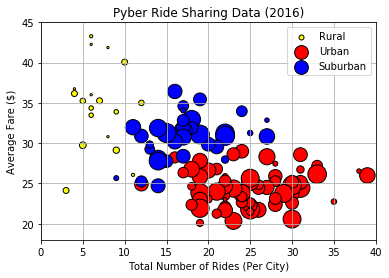

In [226]:
#Obtain the x and y coordinates for each of the three city types

#Build the scatter plots for each city types

#Rural
rural = pyber_data.loc[pyber_data ['type'].isin(['Rural'])]
rural_average = rural.groupby(rural['city']).mean()
rural_rides = pd.DataFrame({'ride': rural['city'].value_counts()})
rural_rides
rural_plot = rural_rides.join(rural_average)
ax= rural_plot.plot.scatter(x= 'ride', y = 'fare', marker="o", color="yellow", edgecolors = 'black',
                                  s = rural_plot['driver_count']*5, label = "Rural")
                    
#Urban
urban = pyber_data.loc[pyber_data ['type'].isin(['Urban'])]
urban_average = urban.groupby(['city']).mean()
urban_rides = pd.DataFrame({'urban_ride': urban['city'].value_counts()})
urban_rides
urban_plot = urban_rides.join(urban_average)
ax= urban_plot.plot.scatter(x= 'urban_ride', y = 'fare', marker="o", color="red", edgecolors = 'black',
                                  s = urban_plot['driver_count']*5, label = "Urban", ax = ax)
                    


#Suburban
suburban = pyber_data.loc[pyber_data ['type'].isin(['Suburban'])]
suburban_average = suburban.groupby(['city']).mean()
suburban_rides = pd.DataFrame({'suburban_ride': suburban['city'].value_counts()})
suburban_rides
suburban_plot = suburban_rides.join(suburban_average)
suburban_plot.plot.scatter(x= 'suburban_ride', y = 'fare', marker="o", color="blue", edgecolors = 'black',
                                  s = urban_plot['driver_count']*5, label = "Suburban", ax = ax)
#Incorporate the other graph properties

plt.grid()
plt.xlim(0, 40)
plt.ylim(18, 45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


#Create a legend
#Incorporate a text label regarding circle size
plt.legend(loc="upper right")
print('Note: Circle size correlates with driver count per city')

#Save Figure
plt.savefig("../Images/Pyber2016.png")
plt.show()


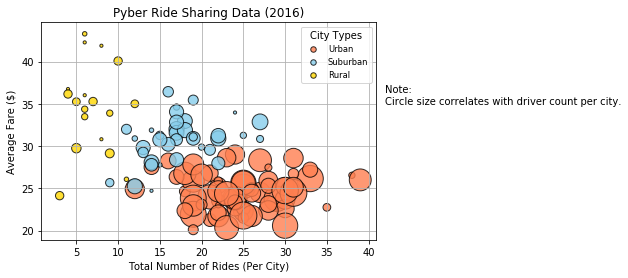

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

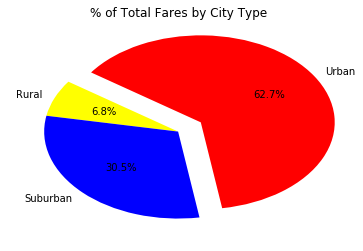

In [227]:
# Calculate Type Percents
rural = pyber_data.loc[pyber_data ['type'].isin(['Rural'])]
rural_total = rural['fare'].sum()
urban = pyber_data.loc[pyber_data ['type'].isin(['Urban'])]
urban_total = urban['fare'].sum()
suburban = pyber_data.loc[pyber_data ['type'].isin(['Suburban'])]
suburban_total = suburban['fare'].sum()

# Build Pie Chart
total_fare = [ rural_total, suburban_total,urban_total]
types = ['Rural','Suburban', 'Urban']
colors = ['yellow', 'blue', 'red']
explode = (0, 0, 0.2)
plt.pie(total_fare, labels= types, colors=colors, explode = explode,
        autopct="%1.1f%%", startangle=145)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("../Images/%ofTotalFares.png")
plt.show()



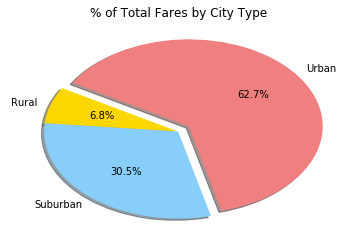

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

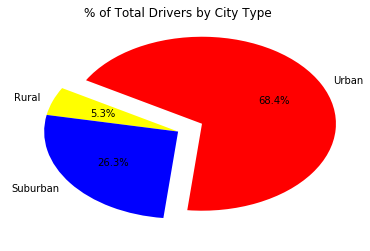

In [228]:
# Calculate Ride Percents
rural = pyber_data.loc[pyber_data ['type'].isin(['Rural'])]
rural_totalrides = rural['type'].count()
urban = pyber_data.loc[pyber_data ['type'].isin(['Urban'])]
urban_totalrides = urban['type'].count()
suburban = pyber_data.loc[pyber_data ['type'].isin(['Suburban'])]
suburban_totalrides = suburban['type'].count()

# Build Pie Chart
total_rides = [ rural_totalrides, suburban_totalrides ,urban_totalrides]
types = ['Rural','Suburban', 'Urban']
colors = ['yellow', 'blue', 'red']
explode = (0, 0, 0.2)
plt.pie(total_rides, labels=types, colors=colors, explode = explode,
        autopct="%1.1f%%", startangle=150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/%ofTotalRides.png")
plt.show()

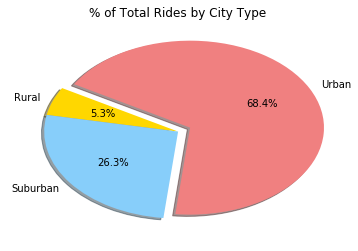

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

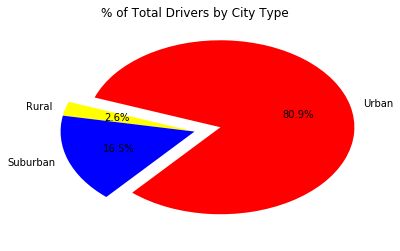

In [229]:
# Calculate Driver Percents
rural = city_data.loc[city_data ['type'].isin(['Rural'])]
rural_totaldrivers = rural['driver_count'].sum()
urban = city_data.loc[city_data ['type'].isin(['Urban'])]
urban_totaldrivers = urban['driver_count'].sum()
suburban = city_data.loc[city_data ['type'].isin(['Suburban'])]
suburban_totaldrivers = suburban['driver_count'].sum()

# Build Pie Chart
total_drivers = [ rural_totaldrivers, suburban_totaldrivers ,urban_totaldrivers]
types = ['Rural','Suburban', 'Urban']
colors = ['yellow', 'blue', 'red']
plt.pie(total_drivers, labels=types, explode = explode, colors=colors,
        autopct="%1.1f%%", startangle = 160)
explode = (0, 0, 0.1)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/%ofTotalDrivers.png")
plt.show()

In [203]:
# Show Figure
plt.show()